##해석 ( 처음에 실시한 k=3 클러스터링 )

In [ ]:
cluster_summary

,추정 노인 자살률,경로당 수,요양보호사 수,평균노선수,노인 보행 교통사고,노인인구 수,1인당 독거노인 합계,1인당 기초수급자 합계,1인당 저소득노인 합계,1인당 노인의료복지시설 수,1인당 재가노인복지시설 수,1인당 복지관 수,1인당 복지관종사자 수,1인당 노인교실 수,1인당 정류장수
클러스터_PCA_3,,,,,,,,,,,,,,,
0,36.159707,154.071429,20437.196429,3.609024,91.500,82014.500,0.261753,0.083290,0.008039,0.000157,0.001329,0.000040,0.001304,0.000178,0.005499
1,31.100641,143.500000,12142.000000,3.554277,61.375,61933.375,0.234724,0.054872,0.005394,0.000076,0.000939,0.000065,0.001525,0.000251,0.008220
2,40.252991,61.666667,6245.666667,4.089782,67.000,33342.000,0.322079,0.081704,0.013755,0.000221,0.001096,0.000090,0.004202,0.000194,0.010109


분류한 클러스터 특징과 가장 비슷한 구를 하나씩 찾은 것.

In [ ]:
# 군집별 대표 자치구 찾기
representative_districts = {}

for cluster_num in df_cleaned['클러스터_PCA_3'].unique():
    # 해당 군집 데이터
    cluster_data = df_cleaned[df_cleaned['클러스터_PCA_3'] == cluster_num][cols_to_use]

    # 군집 중심 (평균값)
    cluster_center = cluster_data.mean().values.reshape(1, -1)

    # 각 자치구 데이터와 군집 중심 거리 계산
    indices, distances = pairwise_distances_argmin_min(cluster_data, cluster_center)

    # 대표 자치구: 중심값과 가장 가까운 자치구
    closest_gu = df_cleaned[df_cleaned['클러스터_PCA_3'] == cluster_num].iloc[indices[0]]['자치구']
    representative_districts[cluster_num] = closest_gu

print("\nCluster별 대표 자치구:")
for cluster_num, gu_name in representative_districts.items():
    print(f"Cluster {cluster_num}: {gu_name}")


Cluster별 대표 자치구:
Cluster 2: 종로구
Cluster 1: 용산구
Cluster 0: 광진구


<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]
<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]
<ipython-input-40-a241fddcbb62>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = rep_row.geometry.centroid.iloc[0]


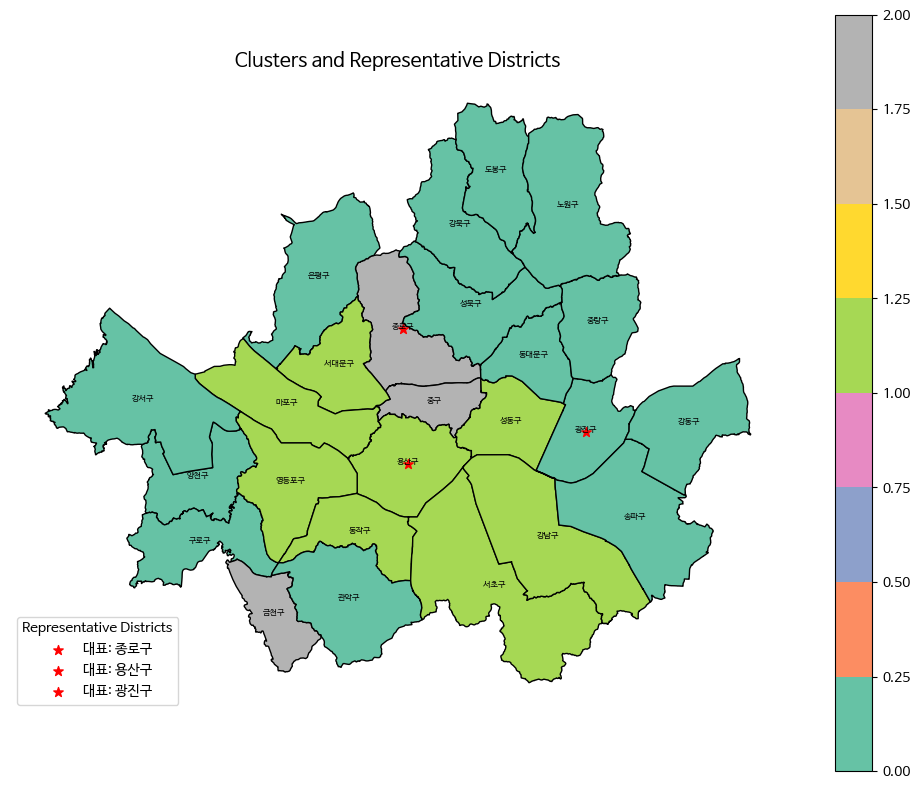

In [ ]:
shp_path = "/content/drive/MyDrive/코랩/데이터마이닝/팀플/data/LARD_ADM_SECT_SGG_11_202505.shp"
gdf = gpd.read_file(shp_path).rename(columns={"SGG_NM": "자치구"})
gdf["자치구"] = gdf["자치구"].apply(lambda x: x.replace("서울특별시", "").strip())
gdf = gdf.to_crs(epsg=4326)

# 군집 결과를 병합
merged = gdf.merge(df_cleaned[['자치구', '클러스터_PCA_3']], on='자치구', how='left')

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column='클러스터_PCA_3', cmap='Set2', legend=True, edgecolor='black', ax=ax)
ax.set_title("Clusters and Representative Districts", fontsize=14)

# 대표 자치구 위치만 강조 (별 표시)
for cluster_num, gu_name in representative_districts.items():
    rep_row = merged[merged['자치구'] == gu_name]
    centroid = rep_row.geometry.centroid.iloc[0]
    ax.scatter(centroid.x, centroid.y, color='red', s=50, marker='*', label=f'대표: {gu_name}')

# 🔹 각 자치구 이름을 **한글로** 표시
for idx, row in merged.iterrows():
    if pd.notnull(row['자치구']):
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, row['자치구'], ha='center', fontsize=6, color='black')

# 축 제거 및 범례 표시
ax.axis("off")
ax.legend(title='Representative Districts', loc='lower left')
plt.tight_layout()
plt.show()

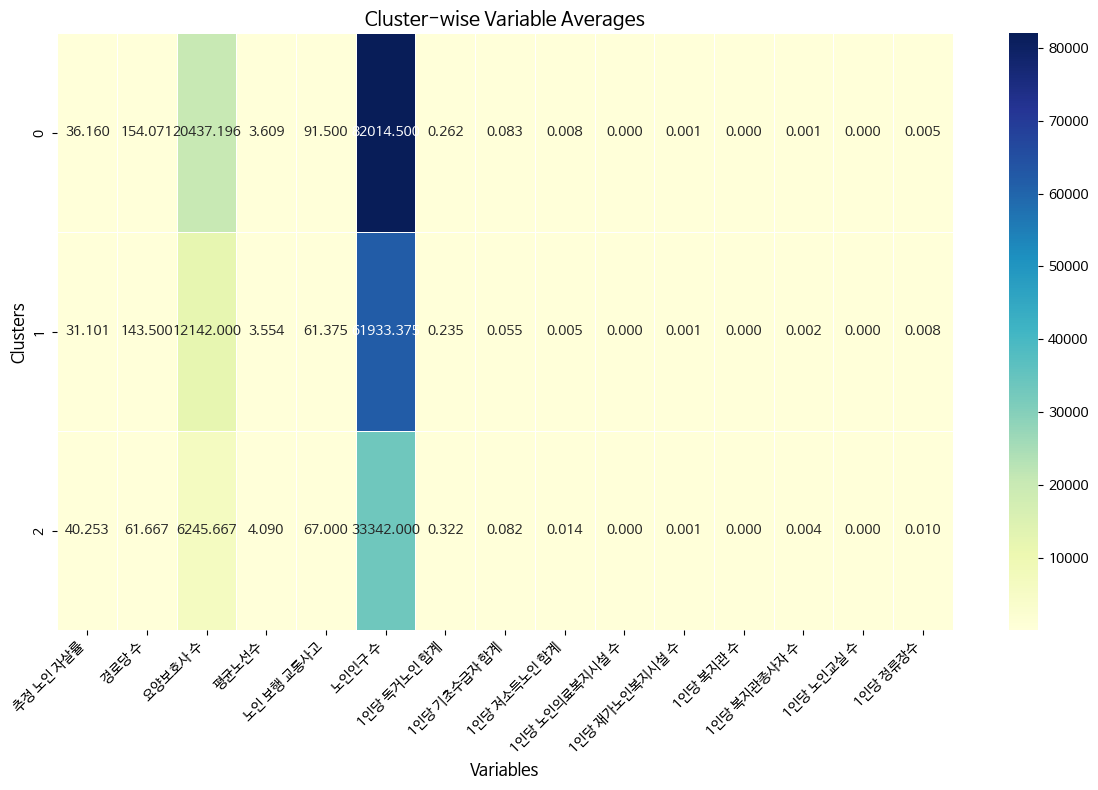

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('Cluster-wise Variable Averages', fontsize=14)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

클러스터 간 차이가 큰 변수들: ['경로당 수', '요양보호사 수', '노인 보행 교통사고', '노인인구 수']


<ipython-input-42-b22c1188b788>:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


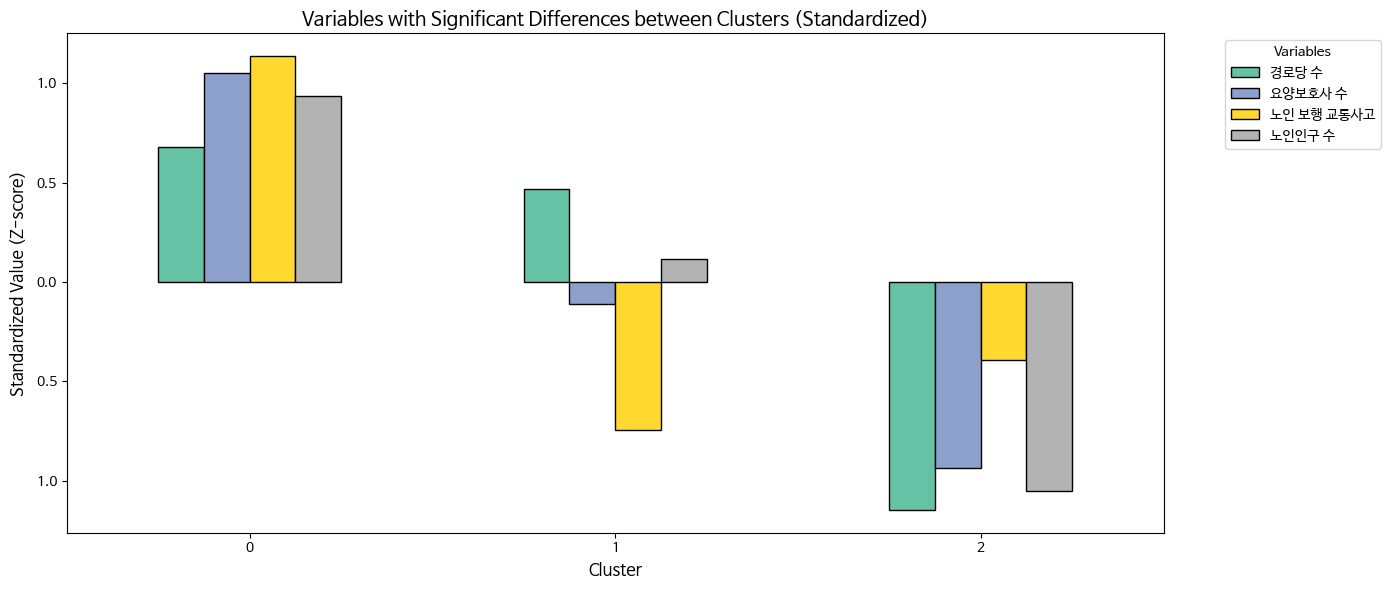

In [ ]:
diff = cluster_summary.max() - cluster_summary.min()

# 차이가 큰 변수만 선택 (예: 10 이상 차이)
important_vars = diff[diff > 10].index.tolist()
print("클러스터 간 차이가 큰 변수들:", important_vars)

# 차이가 큰 변수만 선택
cluster_summary_selected = cluster_summary[important_vars]

# Z-score로 변환 (표준화)
cluster_summary_standardized = (cluster_summary_selected - cluster_summary_selected.mean()) / cluster_summary_selected.std()

# 바 차트로 시각화
cluster_summary_standardized.plot(kind='bar', figsize=(14, 6), colormap='Set2', edgecolor='black')
plt.title('Variables with Significant Differences between Clusters (Standardized)', fontsize=14)
plt.ylabel('Standardized Value (Z-score)', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 클러스터별 우선순위 도출

In [ ]:
#  카테고리별 변수 지정
infra_vars = ['1인당 복지관 수', '1인당 노인의료복지시설 수', '1인당 재가노인복지시설 수']
service_vars = ['요양보호사 수', '1인당 복지관종사자 수']
mobility_vars = ['1인당 정류장수', '평균노선수']
vulnerable_vars = ['1인당 독거노인 합계', '추정 노인 자살률']

#  Z-score로 표준화
standardized = (cluster_summary - cluster_summary.mean()) / cluster_summary.std()

# 가중치 설정
weights = {
    'infra': 0.15,
    'service': 0.25,
    'mobility': 0.15,
    'vulnerable': 0.45
}

# 카테고리별 평균 점수 (취약계층 역방향)
infra_score = standardized[infra_vars].mean(axis=1)
service_score = standardized[service_vars].mean(axis=1)
mobility_score = standardized[mobility_vars].mean(axis=1)
vulnerable_score = -standardized[vulnerable_vars].mean(axis=1)

# 가중합으로 최종 우선순위 점수 계산
priority_score = (
    infra_score * weights['infra'] +
    service_score * weights['service'] +
    mobility_score * weights['mobility'] +
    vulnerable_score * weights['vulnerable']
)

# 결과 데이터프레임
priority_df = pd.DataFrame({
    'Priority Score': priority_score
}, index=[0, 1, 2])

# 자치구-클러스터 매핑
gu_cluster_df = pd.DataFrame({
    '자치구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
             '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
             '관악구', '서초구', '강남구', '송파구', '강동구'],
    '클러스터_PCA_3': [2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0, 2, 1, 1,
                    0, 1, 1, 0, 0]
})

# 클러스터별 자치구명 리스트로 정리
cluster_gu_dict = gu_cluster_df.groupby('클러스터_PCA_3')['자치구'].apply(list).to_dict()

# 우선순위 높은 순으로 정렬
priority_df_sorted = priority_df.sort_values('Priority Score', ascending=True)
priority_df_sorted['정책 도입 순위'] = range(1, len(priority_df_sorted) + 1)

# 각 순위별로 포함된 자치구 출력
print(" 클러스터별 최종 정책 도입 순위 및 자치구:")
for idx, row in priority_df_sorted.iterrows():
    cluster_id = idx
    gu_list = cluster_gu_dict.get(cluster_id, [])
    순위 = int(row['정책 도입 순위'])
    print(f"\n순위 {순위}위 (클러스터 {cluster_id}) - 정책 시급도: {row['Priority Score']:.3f}")
    print("포함된 자치구:", ', '.join(gu_list))

 클러스터별 최종 정책 도입 순위 및 자치구:

순위 1위 (클러스터 2) - 정책 시급도: -0.190
포함된 자치구: 종로구, 중구, 금천구

순위 2위 (클러스터 0) - 정책 시급도: -0.018
포함된 자치구: 광진구, 동대문구, 중랑구, 성북구, 강북구, 도봉구, 노원구, 은평구, 양천구, 강서구, 구로구, 관악구, 송파구, 강동구

순위 3위 (클러스터 1) - 정책 시급도: 0.208
포함된 자치구: 용산구, 성동구, 서대문구, 마포구, 영등포구, 동작구, 서초구, 강남구
